# Load & Inspect the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import sys
import os
sys.path.append(os.path.abspath(".."))

In [4]:
data = pd.read_csv('../data/BankChurners.csv')
data.head()
data.drop(columns=["CLIENTNUM",'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [5]:
data.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

- the average age of the customer is 46 years old. half of the customer are 46 to 52 years old indicating an older profile

- on average the customer held approximately 4 products 

- 75% of the customers spent at least 2 months inactive in the last 12 months. This is a bad indicator. The bank must plan strategies to improve its clients consumption.

- 75% of the customers contacted the bank at least 2 times in the last 12 months. This is also bad, something in the credit card product is leading customers to contact the company, probably unsatisfied.

- The average credit limit is 8,632. Moreover, it seems to be skewed to the right (mean is greater than median, minimum credit limit is 1,438, while maximum is 34,516).

- The average utilization ratio is about 28%. This is a low value. Moreover, half the customers present a utilization ratio up to 17.6%. The bank must pay attention to it and try to increase the utilization of its credit card service.

- On average, customers made approximately 65 transactions in the last 12 months. This indicates that customers made about 5.4 transactions per month in a year, which is very low.
Moreover, observing the minimum and maximum values, seems there are no inconsistent values.

## Column Detail

| Variable      | Description |
| ----------- | ----------- |
|CLIENTNUM| Client number. Unique identifier for the customer holding the account. Categorical nominal|
| Attrition_Flag   | Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary. -> Churn Flag        |
| Customer_Age      | Demographic variable - Customer's Age in Years. Numerical discrete       |
| Gender      | Demographic variable - M=Male, F=Female. Categorical nominal.       |
| Dependent_count      | Demographic variable - Number of dependents. Numerical discrete.       |
| Education_Level      | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.      |
| Marital_Status      | Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.      |
| Income_Category      | Demographic variable - Annual Income Category of the account holder (<40K - 60K,80K,120K.). Categorical ordinal.       |
| Card_Category      | Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.      |
| Months_on_book      | Period of relationship with bank. Numerical discrete.|
| Total_Relationship_Count      | Total no. of products held by the customer. Numerical discrete.|
| Months_Inactive_12_mon      | No. of months inactive in the last 12 months. Numerical discrete. |
| Contacts_Count_12_mon      | No. of Contacts in the last 12 months. Numerical discrete.      |
| Credit_Limit      |  Credit Limit on the Credit Card. Numerical continuous.|
| Total_Revolving_Bal      | Total Revolving Balance on the Credit Card. Numerical discrete.|
| Avg_Open_To_Buy      | Open to Buy Credit Line (Average of last 12 months). Numerical continuous.     |
|Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1). Numerical continuous. |
|Total_Trans_Amt| Total Transaction Amount (Last 12 months). Numerical discrete.|
|Total_Trans_Ct| Total Transaction Count (Last 12 months). Numerical discrete.|
|Total_Ct_Chng_Q4_Q1| Change in Transaction Count (Q4 over Q1). Numerical continuous. |
|Avg_Utilization_Ratio| Average Card Utilization Ratio. Numerical continuous.|


A couple of feature will be drop including:

- `CLIENTNUM` because it has unique value for each customer and it will not be helpful for our analysis
- `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` Don't have any meaning/importance
- `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` Dont't have any meaning/importance



for interpretation purposes the `Attrition_Flag` will be renamed as `Churn_Flag`. and convert the categorical binary column into numerical binary column (change the value into 0 and 1)

In [6]:
data['Gender'] = data['Gender'].map({"M" : 1, "F":0})
data['Attrition_Flag'] = data['Attrition_Flag'].map({"Attrited Customer" : 1, "Existing Customer" : 0})
data.rename(columns={"Attrition_Flag" : "Churn_Flag"}, inplace=True)

# Split Train and Test Data

To avoid data leakage we will perform the train and test data prior to the Explatory data analysis and also to get the realistic represenation and later evalutate the model with unseen data 

we specity stratify=y to the splitting process mantains the distribution of each class percentage in both train and test data. this is useful for an imbalanced dataset which is the case for this task since there are more existing customer than an attrited ones

In [7]:
X = data.drop(columns=['Churn_Flag'], axis=1)
y = data['Churn_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

# Exploratory Data Analysis

Exploratory Data Analysis is an approach to analyze a dataset to understand their characteristics, summarize them, and identify patterns, anomalies and relationship. 

on this section we will get a better understanding on how the the feature are distributed, the relationship between each features, correlation, trends, and insight from the data, also in regards with the target variable. 

We will perform 3 types of data analysis:
1. Univariate Analysis
2. Bivariate Analysis & Multivariate Analysis



In [8]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

Customer_Age  Gender  Dependent_count Education_Level Marital_Status  \
9524            52       1                3        Graduate        Married   
1586            37       0                3        Graduate         Single   
8615            45       0                3     High School        Married   
4667            43       0                3        Graduate         Single   
4887            44       0                5        Graduate         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
9524     $60K - $80K          Blue              44                         1   
1586  Less than $40K          Blue              36                         3   
8615  Less than $40K          Blue              32                         2   
4667  Less than $40K          Blue              30                         3   
4887  Less than $40K          Blue              37                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
9524                       2                      1       23889.0   
1586                       2                      3        6077.0   
8615                       5                      1        2948.0   
4667                       3                      1        4075.0   
4887                       2                      4        1491.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
9524                  603          23286.0                 0.792   
1586                 1397           4680.0                 0.834   
8615                  968           1980.0                 0.946   
4667                 2189           1886.0                 0.695   
4887                    0           1491.0                 0.551   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
9524            13360             124                0.968   
1586             2837              74                0.609   
8615             7834              86                0.509   
4667             3956              71                0.732   
4887             1970              46                0.484   

      Avg_Utilization_Ratio  Churn_Flag  
9524                  0.025           0  
1586                  0.230           0  
8615                  0.328           0  
4667                  0.537           0  
4887                  0.000           1

In [9]:
numerical_features = train.select_dtypes('number').columns.tolist()
categorical_features = train.select_dtypes('object').columns.tolist()


print(f"Number of numerical Features: {len(numerical_features)}")
print(f"Numerical_feature includes: {numerical_features}")
print("-"*40)
print(f"Number of numerical Features: {len(categorical_features)}")
print(f"Numerical_feature includes: {categorical_features}")

Number of numerical Features: 16
Numerical_feature includes: ['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Churn_Flag']
----------------------------------------
Number of numerical Features: 4
Numerical_feature includes: ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


It is important to us to indentify the cardinlaty of the categorical values so that we can decide what kinds of encoding that will be apply later

In [10]:
for feat in categorical_features:
    print("-"*50)
    print(f"There are {data[feat].nunique()} values in {feat}")
    print(train[feat].value_counts(normalize=True))

--------------------------------------------------
There are 7 values in Education_Level
Education_Level
Graduate         0.308097
High School      0.203160
Unknown          0.149572
Uneducated       0.145095
College          0.098091
Post-Graduate    0.052403
Doctorate        0.043581
Name: proportion, dtype: float64
--------------------------------------------------
There are 4 values in Marital_Status
Marital_Status
Married     0.462936
Single      0.388677
Unknown     0.075049
Divorced    0.073338
Name: proportion, dtype: float64
--------------------------------------------------
There are 6 values in Income_Category
Income_Category
Less than $40K    0.354049
$40K - $60K       0.178012
$80K - $120K      0.149704
$60K - $80K       0.136932
Unknown           0.108624
$120K +           0.072679
Name: proportion, dtype: float64
--------------------------------------------------
There are 4 values in Card_Category
Card_Category
Blue        0.931534
Silver      0.054510
Gold        0.011

we can see on the data above an ordinal relationship on the `Education_Level`, `Income_Category`, `Card_Category`. Therefore using Ordinal Encoder might be the best option or encoding them


## Univariate Data Analysis

## Target Distribution

In [11]:
import plotly.express as px
px.pie(train,names='Churn_Flag', title='Proportion of churn vs not churn customers', hole=0.33)

The target is imbalanced. 16.1% of the customers are churners (labeled as 1). Thus, we will adopt some strategies in order to deal with this. They are:

* Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.

* Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a churner customer. These weights are defined on the model specific hyperparameter for it.

* Take a look at precision-recall trade-off if necessary. The main objective here is to predict churn probabilities, not a binary prediction. This will enable the bank to make better informed decisions. Instead of simply assessing if a client will attrit or not, it can check how likely he is to skip the service.

## Numerical Feature Distribution

we will have a look at the distribution on of the numerical features to check whether there are skewedness in the dataset or not

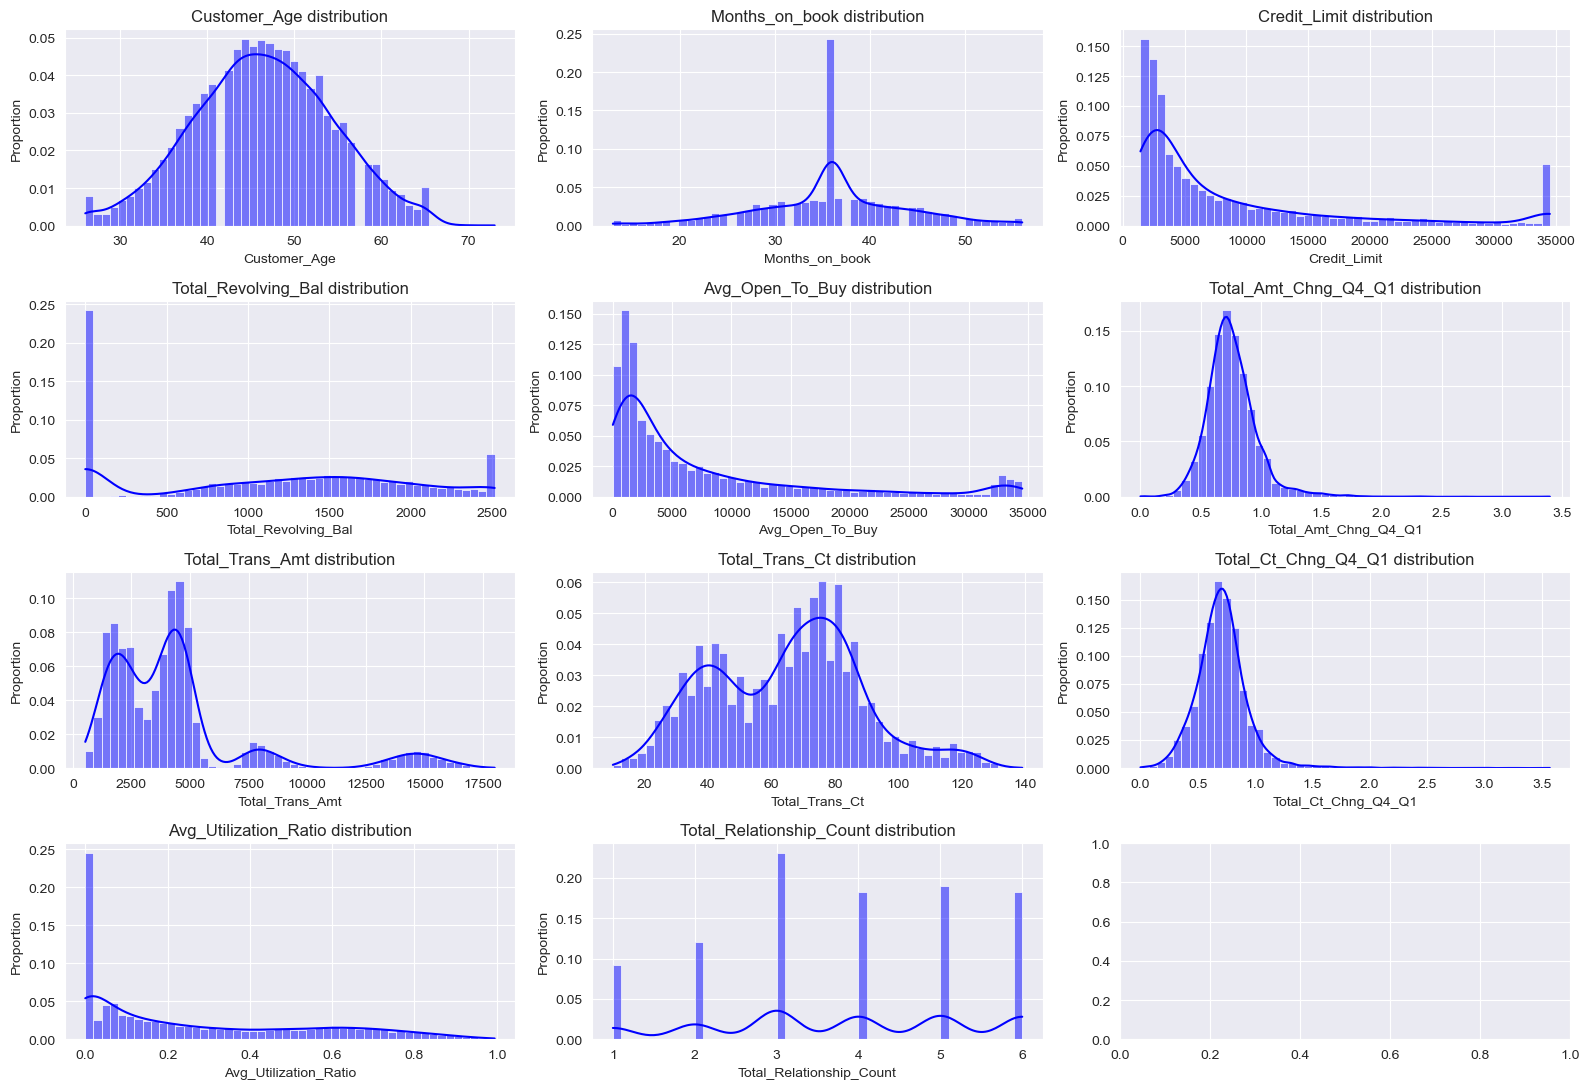

In [12]:
num_features = ['Customer_Age', 
                'Months_on_book', 
                'Credit_Limit', 
                'Total_Revolving_Bal', 
                'Avg_Open_To_Buy', 
                'Total_Amt_Chng_Q4_Q1', 
                'Total_Trans_Amt', 
                'Total_Trans_Ct', 
                'Total_Ct_Chng_Q4_Q1', 
                'Avg_Utilization_Ratio',
                'Total_Relationship_Count']

fig, axes = plt.subplots(4,3, figsize=(16,11))
for ax, feature in zip(axes.flat, num_features):
    sns.histplot(train[feature], bins=50, stat="proportion",kde=True, color='blue', ax=ax)
    ax.set_ylabel(f'Proportion')
    ax.set_title(f"{feature} distribution")

plt.tight_layout()

## Outliers

In [13]:
def check_outliers(data, features):
    outlier_counts = {}
    total_outlier = 0
    for feat in features:
        Q1 = data[feat].quantile(0.25)
        Q3 = data[feat].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_cound = Q3 + 1.5 * IQR
        feature_outlier = data[(data[feat] < lower_bound) | (data[feat] > upper_cound)]
        outlier_count = len(feature_outlier)
        outlier_counts[feat] = outlier_count
        total_outlier += outlier_count
    print(f"There are {total_outlier} outliers in the dataset")
    print()
    print("Outlier Percentage Per feature")
    for feature, count in outlier_counts.items():
        print(f"{feature}: {count} ({round(count/len(data)*100,2)})%")
        

In [14]:
check_outliers(data, num_features)

There are 4023 outliers in the dataset

Outlier Percentage Per feature
Customer_Age: 2 (0.02)%
Months_on_book: 386 (3.81)%
Credit_Limit: 984 (9.72)%
Total_Revolving_Bal: 0 (0.0)%
Avg_Open_To_Buy: 963 (9.51)%
Total_Amt_Chng_Q4_Q1: 396 (3.91)%
Total_Trans_Amt: 896 (8.85)%
Total_Trans_Ct: 2 (0.02)%
Total_Ct_Chng_Q4_Q1: 394 (3.89)%
Avg_Utilization_Ratio: 0 (0.0)%
Total_Relationship_Count: 0 (0.0)%


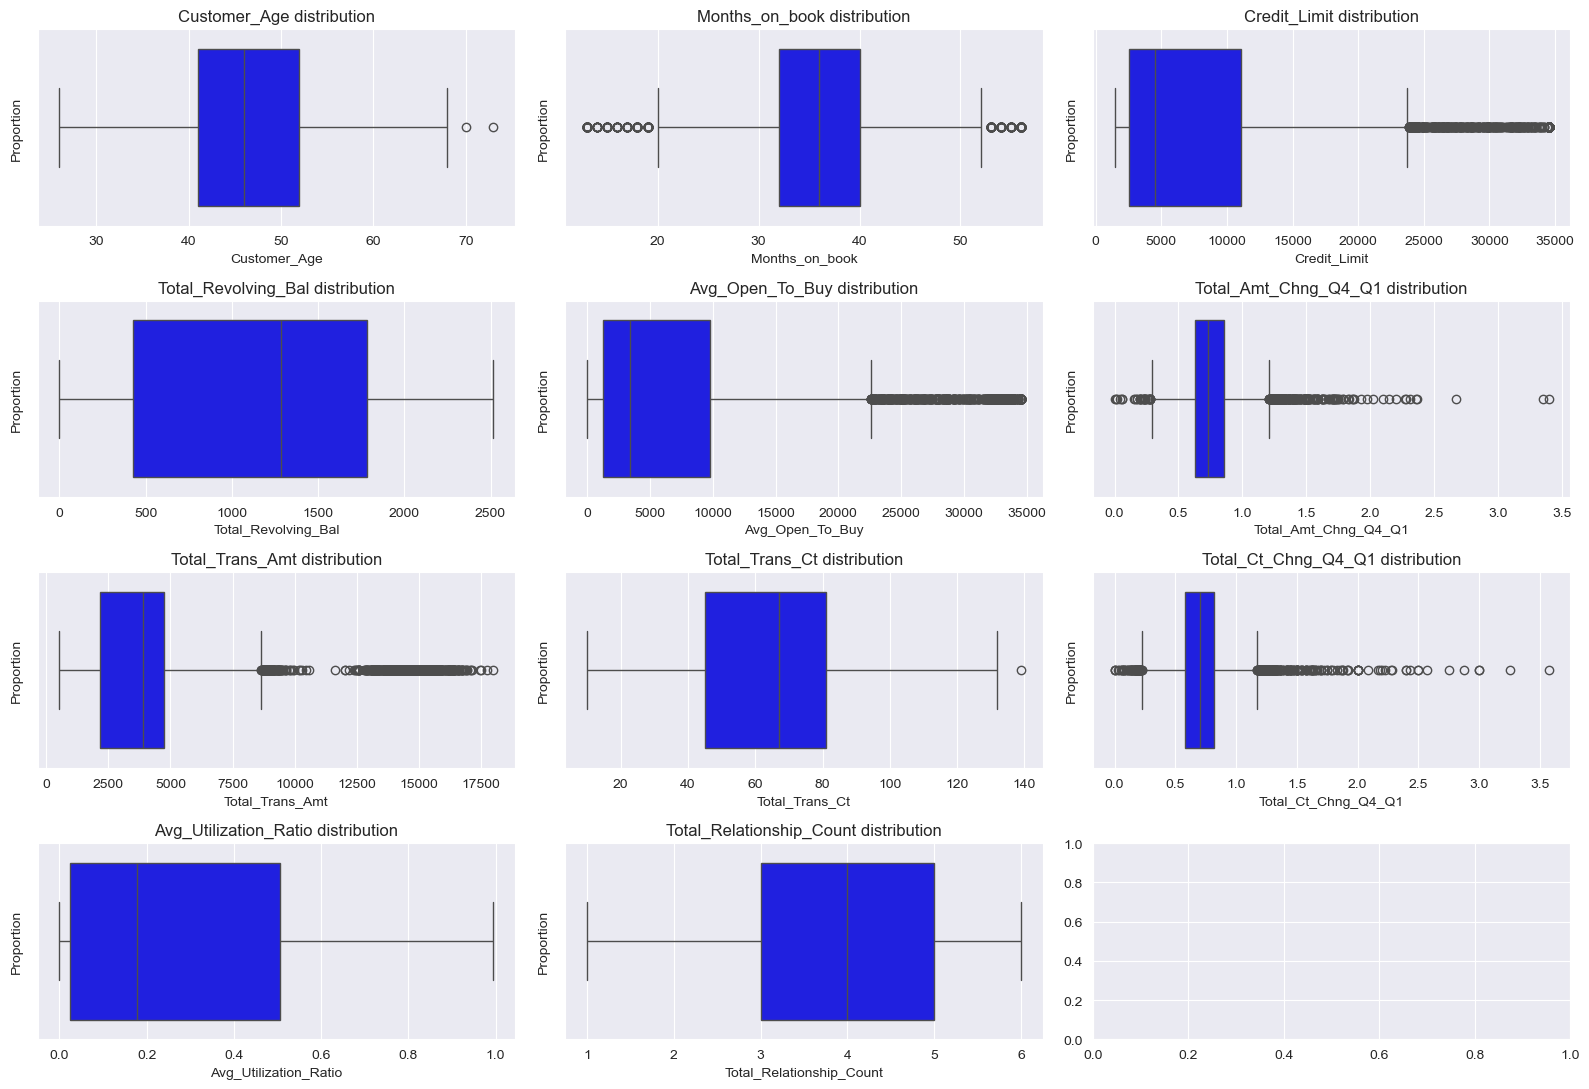

In [15]:
fig, axes = plt.subplots(4,3, figsize=(16,11))
for ax, feature in zip(axes.flat, num_features):
    sns.boxplot(train[feature], color='blue', orient="h",ax=ax)
    ax.set_ylabel(f'Proportion')
    ax.set_title(f"{feature} distribution")

plt.tight_layout()

as we can see on our data plot the proportion of the outliers are small therefore we won't be doing anything for the outliers

## Categorical Feature Distribution

On this section we will plot the categorical feature along with the discrete features

In [16]:
discrete_features = ['Gender', 
                     'Dependent_count', 
                     'Months_Inactive_12_mon', 
                     'Contacts_Count_12_mon']

cat_features = discrete_features + categorical_features

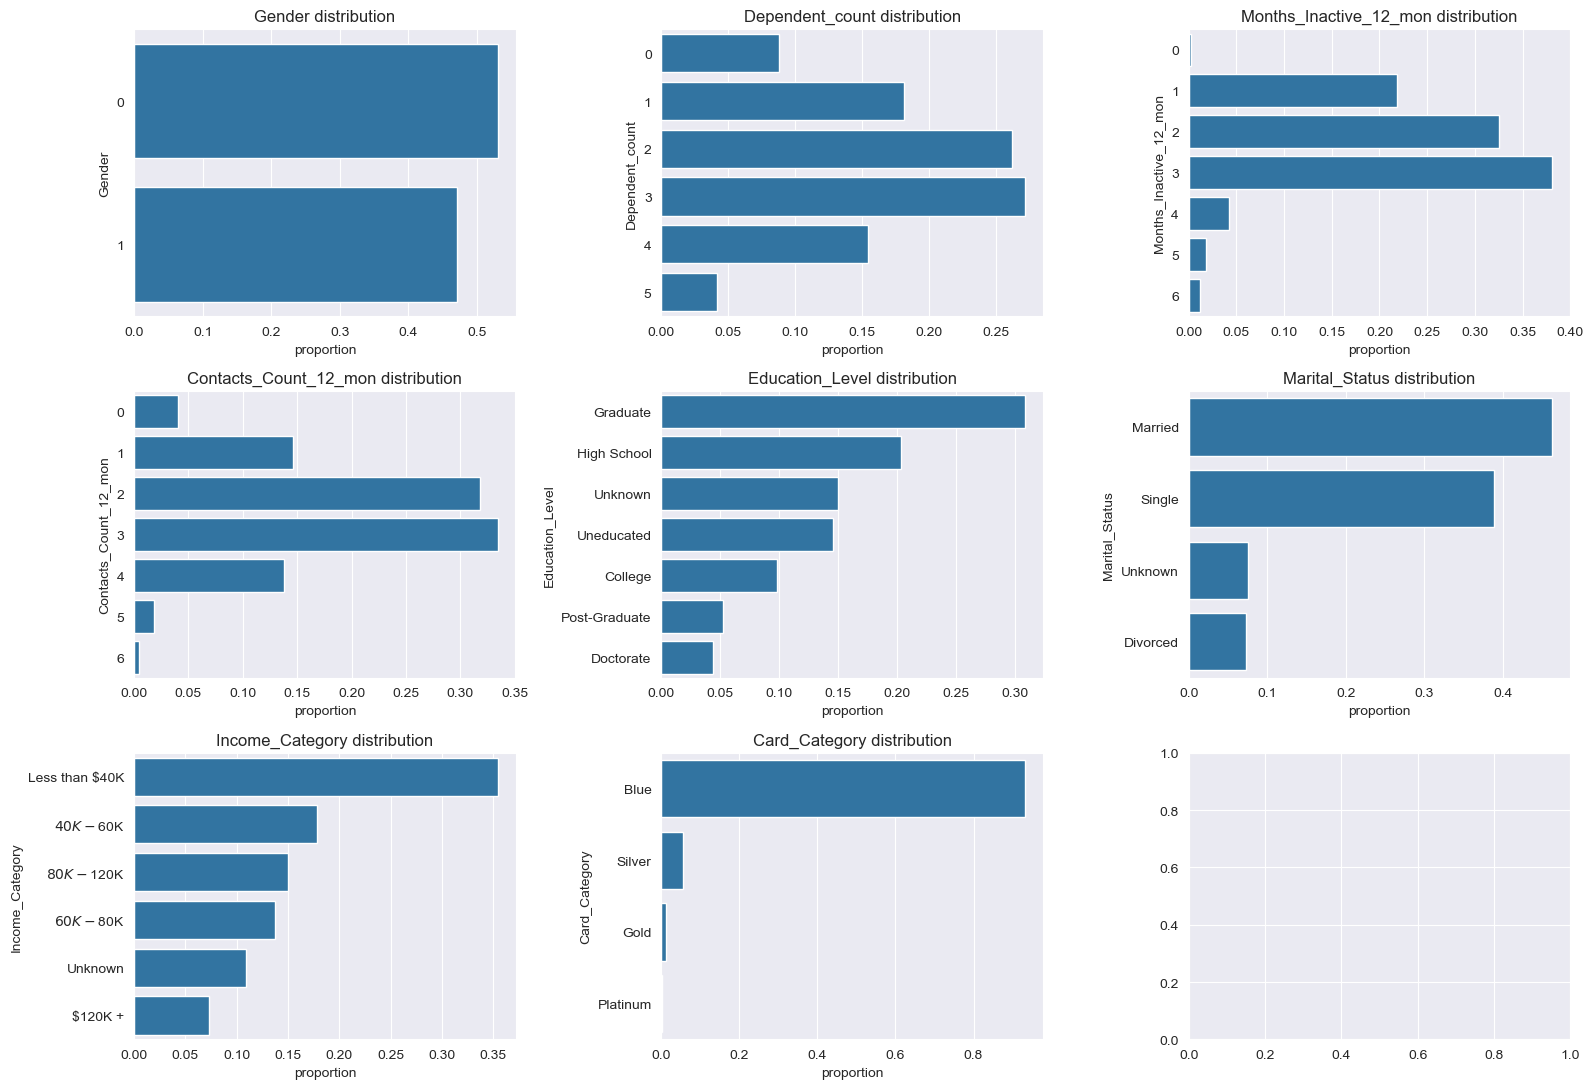

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 11))

for ax, feature in zip(axes.flat, cat_features):
    vc = train[feature].value_counts(normalize=True)
    sns.barplot(x=vc.values,y=vc.index,ax=ax,orient='h')

    ax.set_xlabel("proportion")
    ax.set_ylabel(feature)
    ax.set_title(f"{feature} distribution")



plt.tight_layout()
plt.show()


- More than 50% of the customers are women 
- More than 50% of the customer have 2-3 dependents
- More than 90% of the customer are inactive were inactive in their 1st - 3rd months
- Most of the Customer are graduate, married or single and has an income less then 40K
- There is an imbalanced on the Card_Category_Distribution where blue card holder accounts for 80% from the total proportion. We will take this into accounts on the modeling step. Leaving categories with extremely low proportions of observations can lead to overfitting and card category may not have discriminatory power.

## Bivariate and Multivariate Analysis

in this process we will take on a look on the relationship between the variables especially the relationship with the target variable

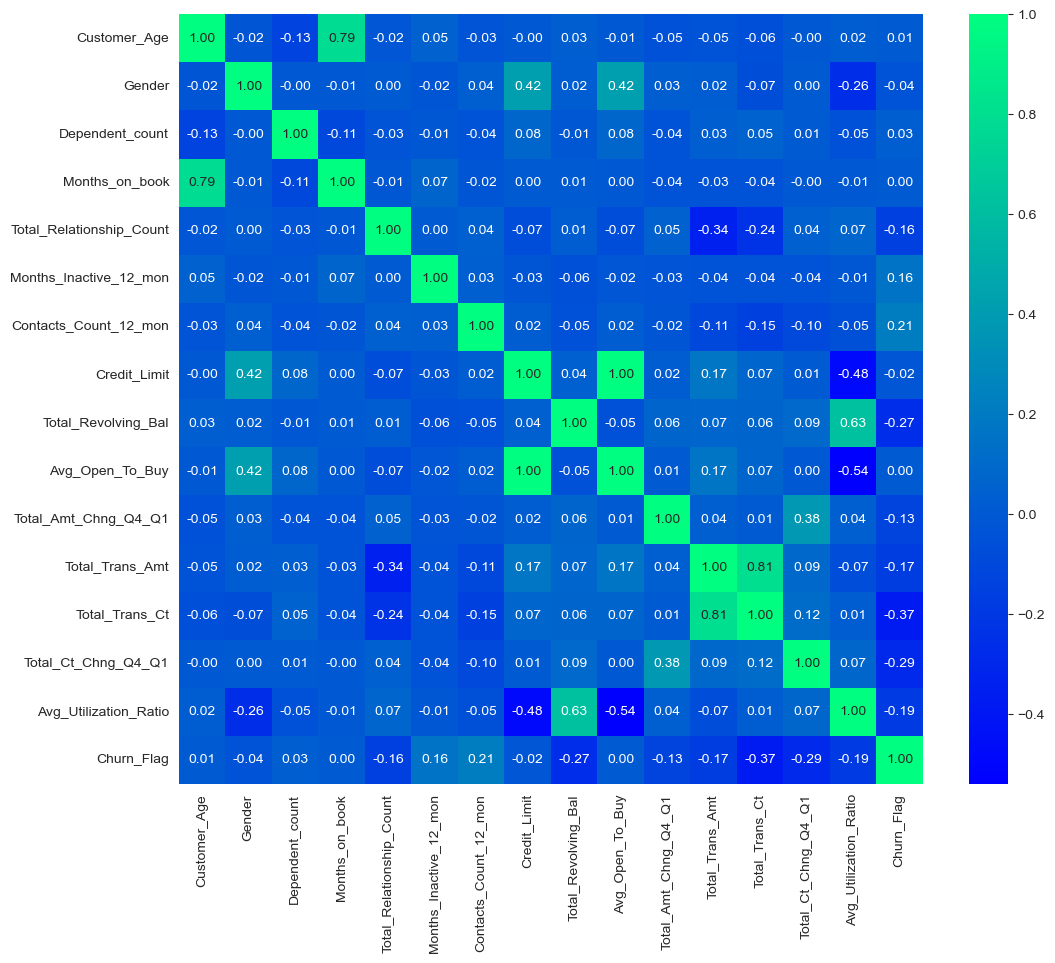

In [20]:
mat_corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(mat_corr, annot=True, cmap="winter", fmt='.2f')
plt.show()

* the total transaction count, total revolving balance has a negative relationship with the target. This makes total sense since the less the customer do transaction the more likely they are to churn. Also customer with lower revolving balances and less variation in their transaction counts are prone to churn due to their inactivity 

* Customer age and month on book are highly correlated. The older the customer is, the more time he spends consuming the banks credit card and vice versa

* Credit limit and Averate utilization ratio are moderately negative correlated. The higher the customer credit limit, the lower the average utilization ratio

* Total revolving balance and average utilization ration are strongly positive correlated. This make sense, as customer uses more of his credit card, they need to pay more the revolving balance

* Gender has a moderate positive correlation with credit. This might indicate that male customer has a higher credit limit than female customer

* Some features that are naturally related are highly correlated, as expected. This is the case for total transaction amount and total transaction count. When building linear models, we have to worry with multicolinearity issues, which occurs when two or more independent variables are highly correlated. Although it is diagnosed with variance inflation factor, observing pearson correlation between pairs can indicate us this issue. It is the case here. However, once I will focus on predictive power, using more robust algorithms like LightGBM, I will not worry with this now.

* Curiously, average open to buy and credit limit are perfectly positively correlated. This means these two variables have a strong and consistent linear relationship in the same direction. This makes sense since open to buy means the amount left in your credit card to use and limit means the used amount which hasn't been paid off yet. Because they present this perfect correlation, one of them becomes redundant. Thus, we will drop avg_open_to_buy in the modeling step because credit_limit is more informative.

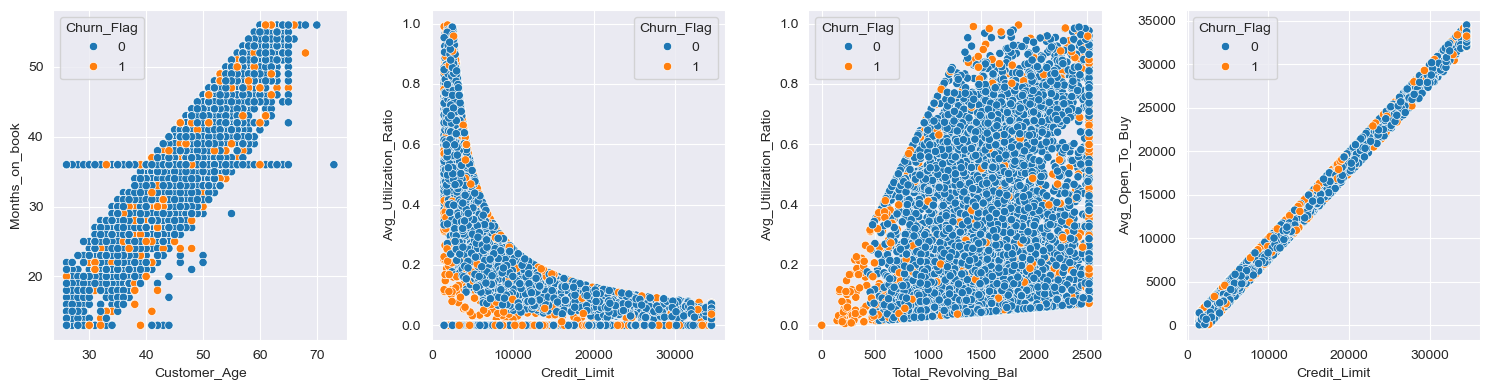

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.scatterplot(data=train, x='Customer_Age', y='Months_on_book', hue='Churn_Flag', ax=axes[0])
sns.scatterplot(data=train, x='Credit_Limit', y='Avg_Utilization_Ratio',  hue='Churn_Flag', ax=axes[1])
sns.scatterplot(data=train, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio',  hue='Churn_Flag', ax=axes[2])
sns.scatterplot(data=train, x='Credit_Limit', y='Avg_Open_To_Buy',  hue='Churn_Flag', ax=axes[3])
plt.tight_layout()
plt.show()

credit limit and average utilization ratio present an exponential decreasing relationship! This indicates that, as credit limit increases, the average utilization ratio decreases at an exponential rate. Thus, customers with higher credit limits use their credit cards less.

### Numerical Feature Distribution by Churn Flag

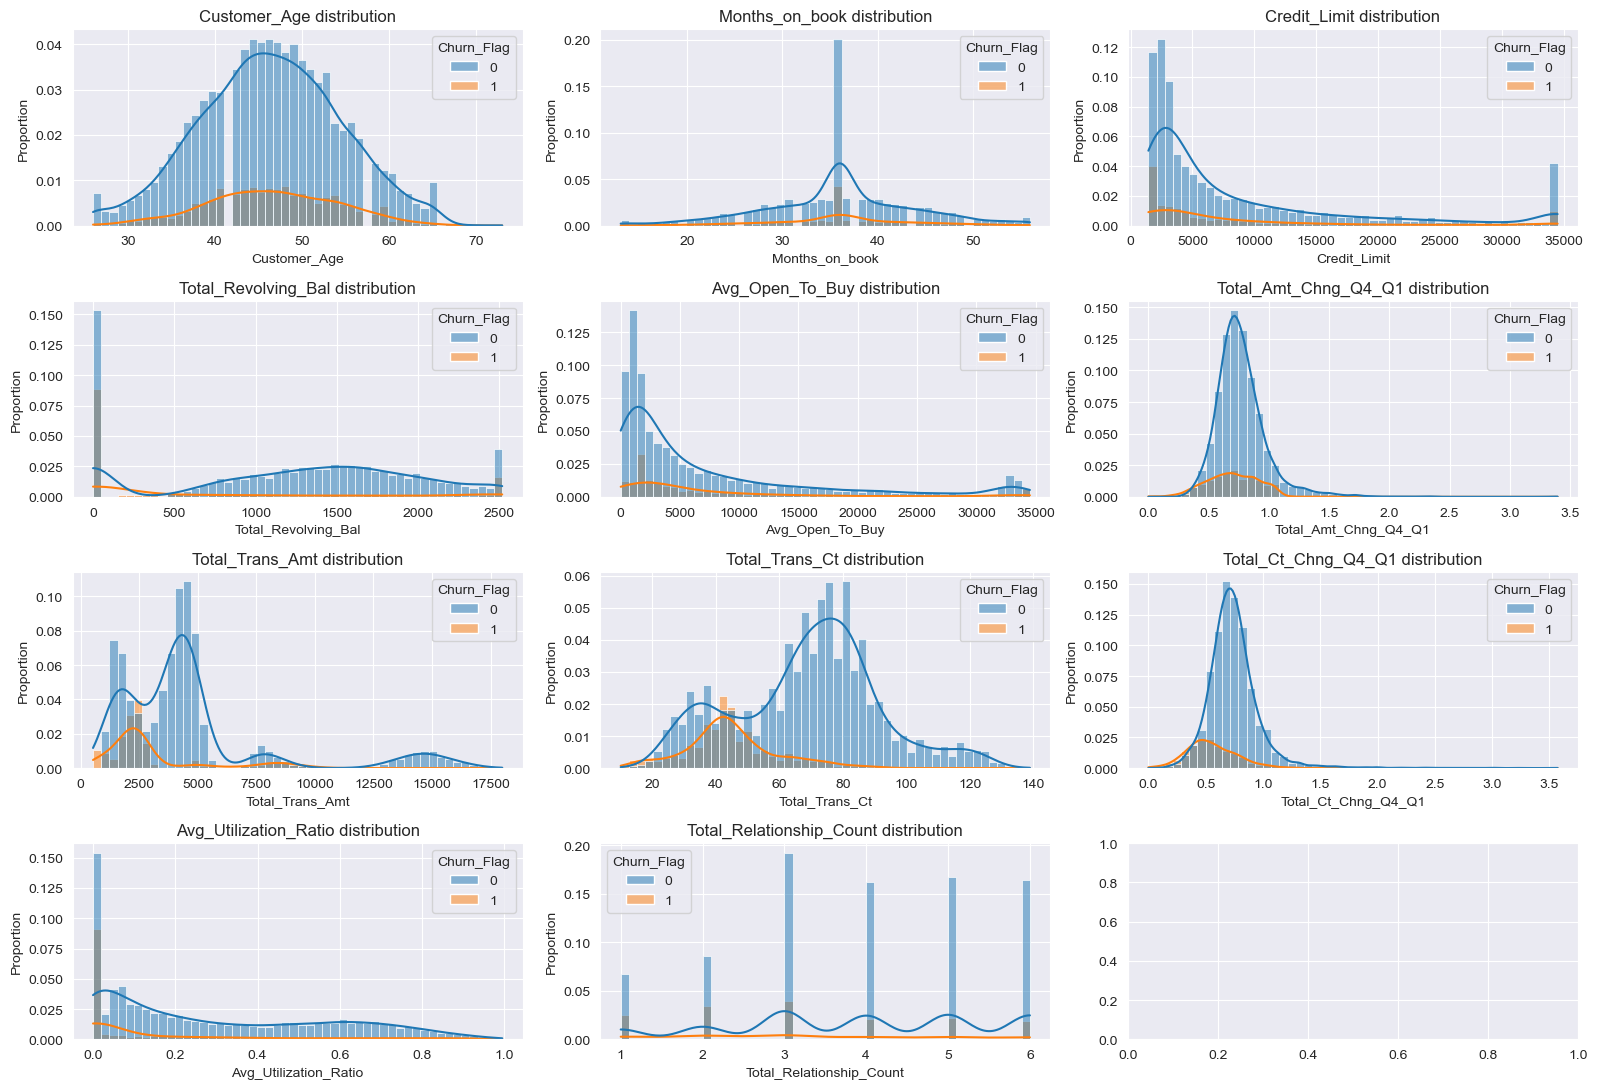

In [22]:
fig, axes = plt.subplots(4,3, figsize=(16,11))
for ax, feature in zip(axes.flat, num_features):
    sns.histplot(train, x=feature, bins=50, hue='Churn_Flag',stat="proportion",kde=True, color='blue', ax=ax)
    ax.set_ylabel(f'Proportion')
    ax.set_title(f"{feature} distribution")

plt.tight_layout()

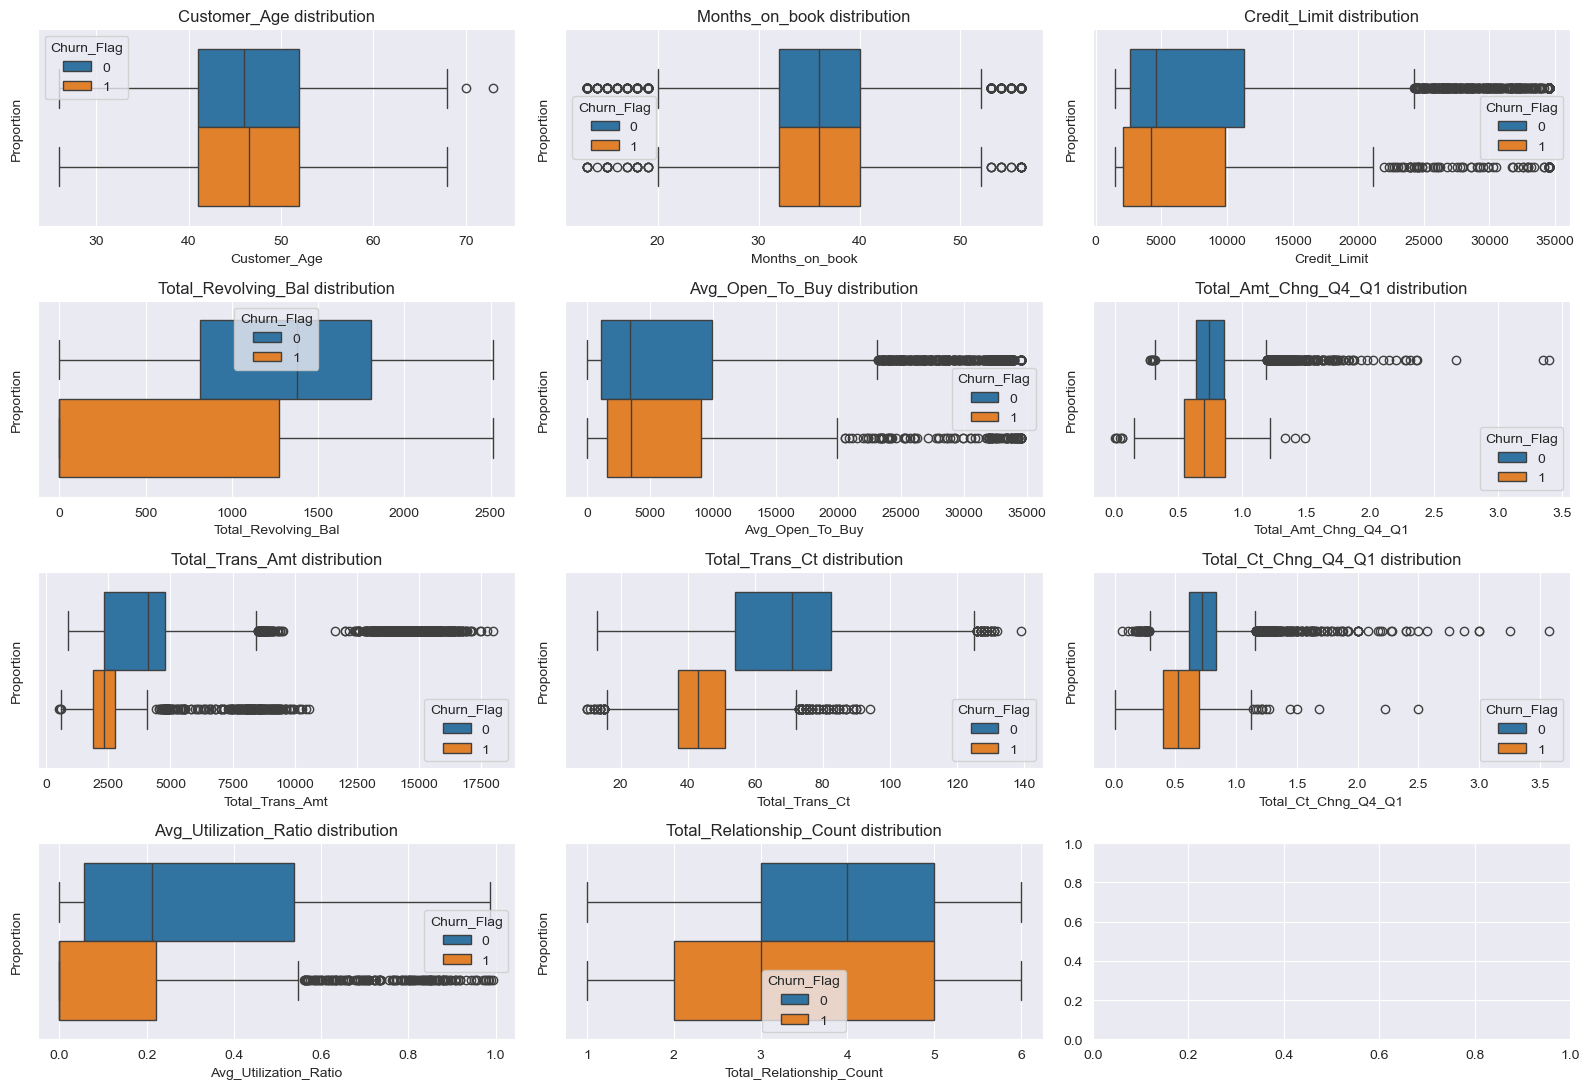

In [24]:
fig, axes = plt.subplots(4,3, figsize=(16,11))
for ax, feature in zip(axes.flat, num_features):
    sns.boxplot(train, x=feature, orient="h",ax=ax, hue="Churn_Flag")
    ax.set_ylabel(f'Proportion')
    ax.set_title(f"{feature} distribution")

plt.tight_layout()



* Customers who churn tend to have fewer products from the bank. Attrited customers generally have between 1 and 3 products

* Customers who churn tend to have slightly lower credit limits.

* Customers who churn tend to have lower revolving balances, which makes sense since churners tend to use their credit cards less. Especially, a large part of them present a zero revolving balance.

* Customers who churn tend to have lower transaction amounts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions, resulting in lower amounts in a period.

* Customers who churn tend have lower transaction counts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions.

* Customers who churn tend to have lower changes in their transaction counts, which makes sense since making fewer transactions will reduce the variation in counts.

* As expected, customers who churn tend to have lower average utilization ratio. Particularly, many of them tend to have a zero utilization ratio.

* An important observation is that a good pratice would be to discretize these continuous features to better analyze their distributions per churners and non-churners. However, with the graphs above we can clearly see a discrimination, and, as I intend to focus on predictive power, building more robust models such as LightGBM, in terms of preprocessing, feature discretization would increase dimensionality and probably be harmful.

## Categorical Distribution by Churn Rate

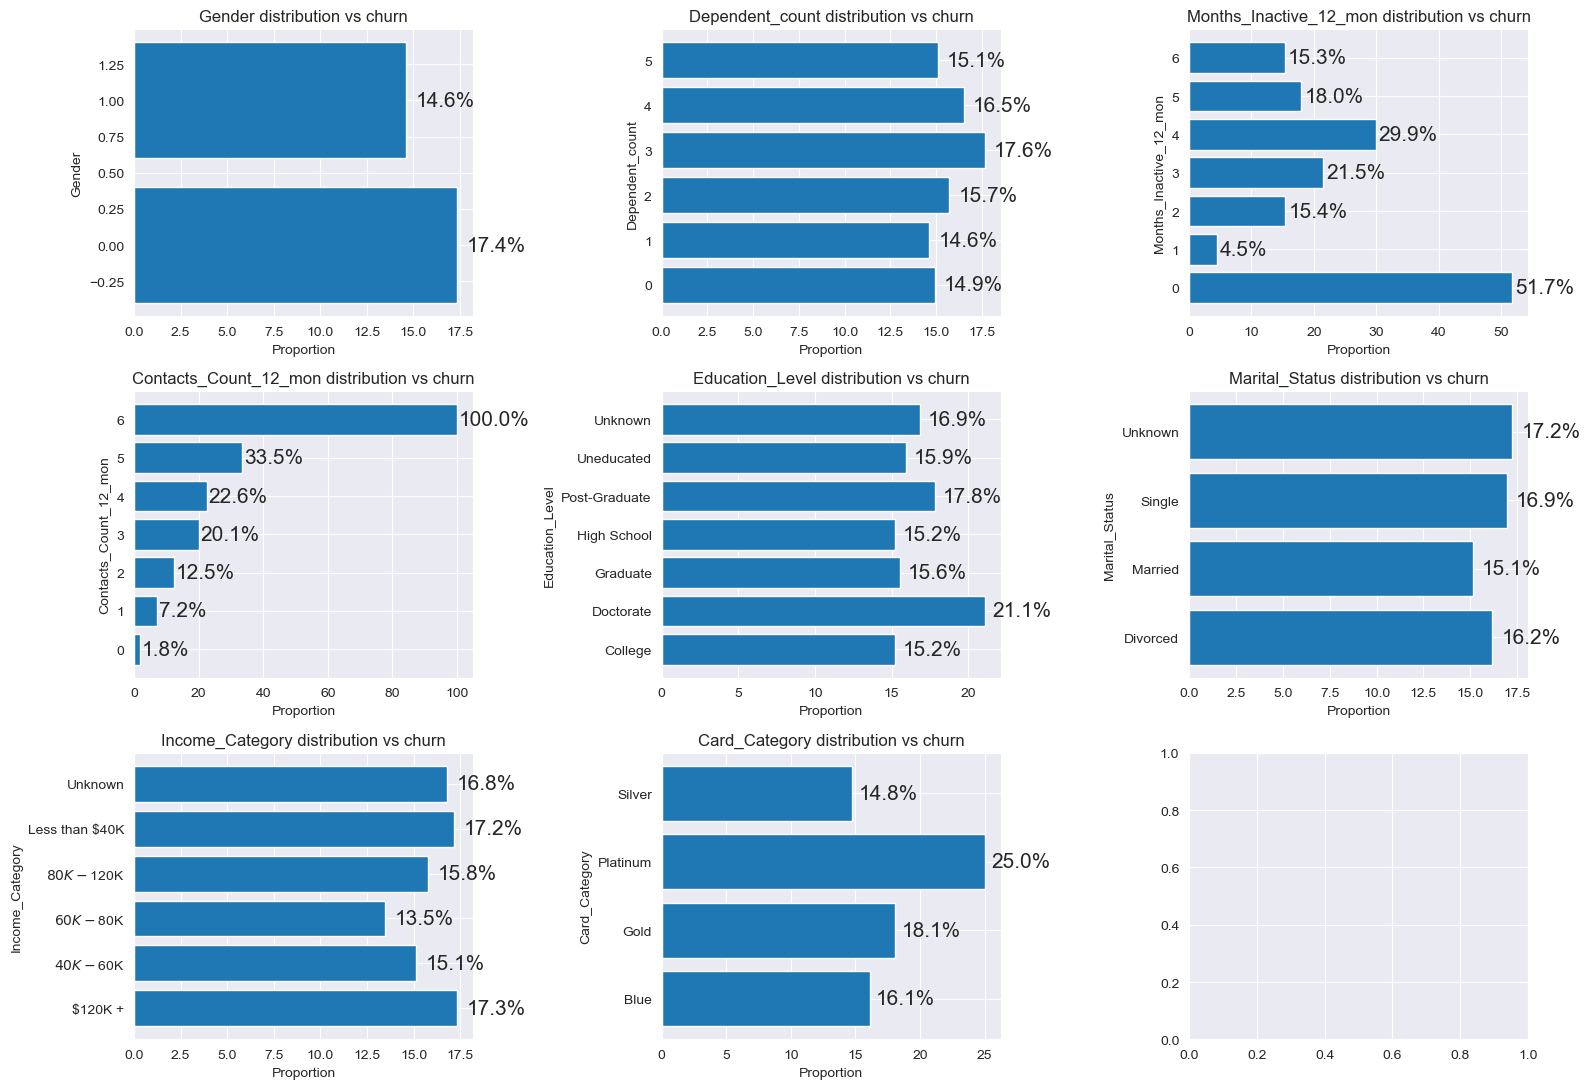

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(16, 11))

for ax, feature in zip(axes.flat, cat_features):
    data_grouped = data.groupby([feature])[['Churn_Flag']].mean().reset_index().rename(columns={'Churn_Flag': 'pct'})
    data_grouped['pct'] *= 100
    ax.barh(y=data_grouped[feature], width=data_grouped['pct'])

    for index, value in enumerate(data_grouped['pct']):
                        # Adjust the text position based on the width of the bars
                        ax.text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=15)

    ax.set_xlabel("Proportion")
    ax.set_ylabel(feature)
    ax.set_title(f"{feature} distribution vs churn")

plt.tight_layout()
plt.show()


* The churn rate consistently increases monotonically as the number of contacts with the bank rises. Especially, all customers who made six contacts churned.

* In marital_status, the unknown category presents the highest churn rate. For education_level and income_category, it presents the second highest churn rates. Thus, it is a good practice to leave it as another category of these variables in the preprocessing step, once it helps discriminating between churners and non-churners.

* Although card_category is highly imbalanced towards blue type, it is possible to see that the churn rate varies across the categories. Particularly, Platinum presents the highest churn rate. Even having a very low number of observations, as I am focusing on the predictive power, building robust models such as LightGBM, I will leave this variable and assess its feature importance or apply a feature selection method to keep it or remove it further.

* The churn rate is higher for women.

* Surprisingly, customers who were never inactive in the last 12 months present the highest churn rate.

* Customers with doctorate educational level present the highest churn rate among the other levels.